## 1  Evaluation Metrics (20 %)

### 1.1  


#### Answer:<br>因為信賴度的公式為 P(A ∩ B)/P(A)，但我們並沒有考慮到B獨立發生的情況，若P(B)本身就很大同時也會造成信賴度變大，換句話說，我們無法從信賴度中看出A、B是否真的有關係，或只是因為P(B)很大所造成的巧合。

### 1.2  

#### Answer:<br>提升度與確信度不受影響的原因在於，提升度的公式有考慮到P(B)的獨立機率，當B、A兩者獨立的時候提升度為1，所以當我們看到提升度大於1時，表示A確實能有效提升，確信度的部分，從定義來看確信度是指當A發生而B沒有發生與B本就不發生的情況相比，它是有考慮到B的獨立機率的(從1-P(B))，有就是當P(B)很高時，信賴度會連帶被提高，但確信度的分母(1-confi(A->B))也會同時變小，因為B本來就很常發生，只有當「B 發生的機率因 A 的出現而大幅改變」時，它才會變大。

### 1.3 

#### Answer:<br>1.信賴度為非對稱的，從公式推導可知，confidence(A->B)=P(A ∩ B)/P(A) confidence(B->A)=P(A ∩ B)/P(B)，也就是說除非P(A)=P(B)的特例之外都不會相等。<br>2.提升度為對稱的，從公式推導可知，lift(A->B)=P(A ∩ B)/(P(B)*P(A))，而lift(B->A)的分母因為乘法的交換律所以是相等的<br>3.確信度是非對稱的，從公式推導可知，分子在算conviction(A->B)時為1-P(B)而(B->A)時為1-P(A)，分母用到的信賴度也並非對稱的，因此除非P(A)=P(B)的特例之外都不會相等。

### 1.4  

#### Answer:<br>1.信賴度有達到最大值，因為信賴度的定義本身值域就是0->1。<br>2.提升度有達到最大值，當confidence為1時，Lift=1/P(B)，當P(B)非常小時Lift可以趨近無限大，也就是雖然B不常發生，但A發生時總伴隨B這樣的強規則。<br>3.確信度有達到最大值，從公式的分母來看1-confidence(A->B)為0，所以確信度趨近無限大，這代表當A發生時B一定發生且不可能違反(conviction=無限大)。

## 2  Application in Recommending Items (30 %)

In [3]:
#from apyori import apriori 
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import time
import matplotlib.pyplot as plt

### 2.1  

In [4]:
transaction=[]
browsing=open('browsing.txt','r')
for line in browsing:
    item=line.strip().split()
    transaction.append(item)

encoder = TransactionEncoder()
encoded_transaction = encoder.fit_transform(transaction)

# 将转换后的数据转换为DataFrame
df = pd.DataFrame(encoded_transaction, columns=encoder.columns_)

frequent_itemsets = apriori(df, min_support=100/len(transaction),max_len=2,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
filtered_itemsets = frequent_itemsets[(frequent_itemsets['length'] == 2)]

# 3. 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 5. 提取並排序結果
# 根据信賴度降序排序，信賴度相同的按字典順序排序
sorted_rules = rules.sort_values(by=["confidence", "antecedents"], ascending=[False, True])

# 6. 打印前五個規則及其信賴度
for index, row in sorted_rules.head(5).iterrows():
    antecedents = list(row["antecedents"])
    consequents = list(row["consequents"])
    confidence = row["confidence"]
    print(f"Items: {antecedents} => {consequents}, Confidence: {confidence}")

Items: ['DAI93865'] => ['FRO40251'], Confidence: 1.0
Items: ['GRO85051'] => ['FRO40251'], Confidence: 0.9991762767710051
Items: ['GRO38636'] => ['FRO40251'], Confidence: 0.9906542056074765
Items: ['ELE12951'] => ['FRO40251'], Confidence: 0.9905660377358491
Items: ['DAI88079'] => ['FRO40251'], Confidence: 0.9867256637168142


### 2.2  

In [5]:
transaction=[]
browsing=open('browsing.txt','r')
for line in browsing:
    item=line.strip().split()
    transaction.append(item)

encoder = TransactionEncoder()
encoded_transaction = encoder.fit_transform(transaction)

# 将转换后的数据转换为DataFrame
df = pd.DataFrame(encoded_transaction, columns=encoder.columns_)

frequent_itemsets = apriori(df, min_support=100/len(transaction),max_len=3,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
filtered_itemsets = frequent_itemsets[(frequent_itemsets['length'] == 3)]

# 3. 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 5. 提取並排序結果
# 根据信賴度降序排序，信賴度相同的按字典順序排序
sorted_rules = rules.sort_values(by=["confidence", "antecedents"], ascending=[False, True])

# 6. 打印前五個規則及其信賴度
for index, row in sorted_rules.head(5).iterrows():
    antecedents = list(row["antecedents"])
    consequents = list(row["consequents"])
    confidence = row["confidence"]
    print(f"Items: {antecedents} => {consequents}, Confidence: {confidence}")

Items: ['ELE26917', 'GRO85051'] => ['FRO40251'], Confidence: 1.0
Items: ['FRO53271', 'GRO85051'] => ['FRO40251'], Confidence: 1.0
Items: ['GRO21487', 'GRO85051'] => ['FRO40251'], Confidence: 1.0
Items: ['GRO38814', 'GRO85051'] => ['FRO40251'], Confidence: 1.0
Items: ['GRO73461', 'GRO85051'] => ['FRO40251'], Confidence: 1.0


## 3  Scalability Comparisons (40 %)

In [4]:
transaction=[]
browsing=open('browsing.txt','r')
for line in browsing:
    item=line.strip().split()
    transaction.append(item)

encoder = TransactionEncoder()
encoded_transaction = encoder.fit_transform(transaction)

#轉換後之數據再轉為DataFrame
df = pd.DataFrame(encoded_transaction, columns=encoder.columns_)

### 3.1  

執行時間:2.5115580558776855
執行時間:2.8958303928375244
執行時間:3.7510550022125244
執行時間:5.705514669418335
執行時間:8.39185118675232
執行時間:20.811421155929565


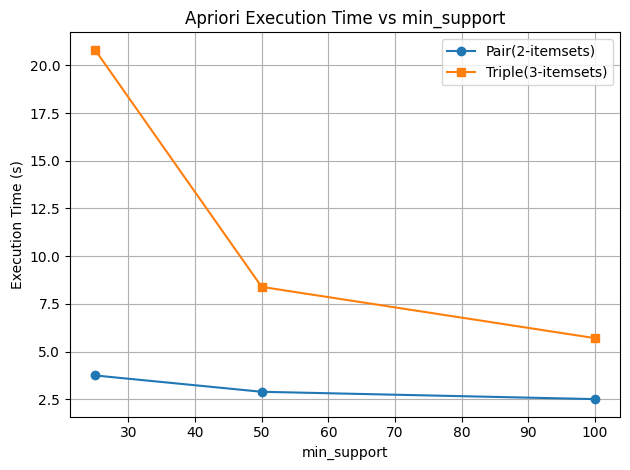

In [5]:
operation_time=[100/len(transaction),50/len(transaction),25/len(transaction)]
item=[2,3]
outcome={"Apriori-Pair":[],"Apriori-Triple":[]}
for i in item:
    for j in operation_time:
        start_time=time.time()
        frequent_itemsets = apriori(df, min_support=j,max_len=i,use_colnames=True,low_memory=True)
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        filtered_itemsets = frequent_itemsets[(frequent_itemsets['length'] ==i)]
        end_time=time.time()
        execution_time=end_time-start_time
        if(i==2):
            outcome['Apriori-Pair'].append(execution_time)
        elif(i==3):
            outcome['Apriori-Triple'].append(execution_time)
        print(f"執行時間:{execution_time}")
x_labels=[100,50,25]
plt.plot(x_labels,outcome['Apriori-Pair'],marker='o', label='Pair(2-itemsets)')
plt.plot(x_labels,outcome['Apriori-Triple'],marker='s', label='Triple(3-itemsets)')
plt.xlabel('min_support')
plt.ylabel('Execution Time (s)')
plt.title('Apriori Execution Time vs min_support')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
Support=["100","50","25"]
df= pd.DataFrame({
    "1": [Support[0], outcome["Apriori-Pair"][0], outcome["Apriori-Triple"][0]],
    "2": [Support[1], outcome["Apriori-Pair"][1], outcome["Apriori-Triple"][1]],
    "3": [Support[2], outcome["Apriori-Pair"][2], outcome["Apriori-Triple"][2]],
},index=["Support","Apriori-Pair","Apriori-Triple"])  
display(df)

,1,2,3
Support,100,50,25
Apriori-Pair,2.511558,2.89583,3.751055
Apriori-Triple,5.705515,8.391851,20.811421


#### 從圖中可以發現隨著支持度閾值的降低兩者所花費的時間皆有所提升，但三項組合的執行時間提升速度明顯快過二項組合(三項組合在50->100時慢了3倍二項組合約1.3倍)，兩者並不平行，也就是說它的擴展性差，當我們想要調查更多產品之間的關聯組合時會同時帶給我們很大的成本。

#### 在本題中的apripri演算法有將參數low_memory設為True，由於在計算最小支持度為50時需要大約18G的記憶體去儲存矩陣因此造成Memory error，最後決定使用low_memory方法，跟一般用法不同的是它不會把全部資訊儲存進記憶體中，而是使用迭代器的方式逐步搜尋優點是可以減少記憶體的使用，缺點則是統計來說會比一般方法要慢，適合用於大型資料集。

### 3.2

執行時間:112.93712639808655
執行時間:372.2282979488373
執行時間:1043.7942097187042
執行時間:145.38757801055908
執行時間:480.49766206741333
執行時間:1528.446256160736


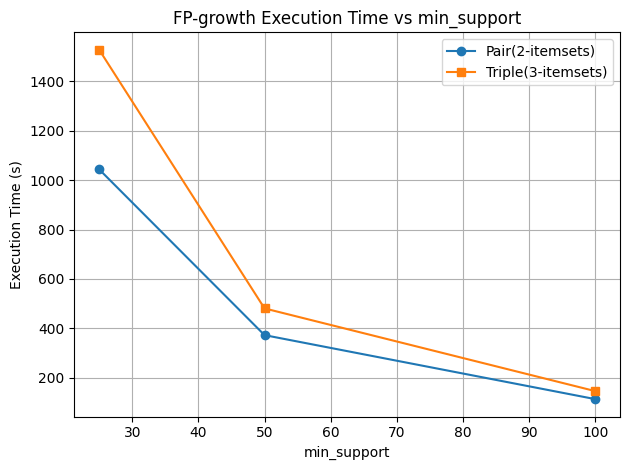

In [8]:
operation_time=[100/len(transaction),50/len(transaction),25/len(transaction)]
item=[2,3]
outcome = {"FP-Pair": [], "FP-Triple": []}
for i in item:
    for j in operation_time:
        start_time=time.time()
        frequent_itemsets = fpgrowth(df, min_support=j, use_colnames=True, max_len=i)
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        filtered_itemsets = frequent_itemsets[(frequent_itemsets['length'] ==i)]
        end_time=time.time()
        execution_time=end_time-start_time
        if(i==2):
            outcome["FP-Pair"].append(execution_time)
        elif(i==3):
            outcome['FP-Triple'].append(execution_time)
        print(f"執行時間:{execution_time}")
x_labels=[100,50,25]
plt.plot(x_labels,outcome["FP-Pair"],marker='o', label='Pair(2-itemsets)')
plt.plot(x_labels,outcome['FP-Triple'],marker='s', label='Triple(3-itemsets)')
plt.xlabel('min_support')
plt.ylabel('Execution Time (s)')
plt.title('FP-growth Execution Time vs min_support')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Support=["100","50","25"]
df= pd.DataFrame({
    "1": [Support[0], outcome["FP-Pair"][0], outcome["FP-Triple"][0]],
    "2": [Support[1], outcome["FP-Pair"][1], outcome["FP-Triple"][1]],
    "3": [Support[2], outcome["FP-Pair"][2], outcome["FP-Triple"][2]],
},index=["Support","FP-Pair","FP-Triple"])  
display(df)

,1,2,3
Support,100,50,25
FP-Pair,1,2,3
FP-Triple,1,2,3


#### 從圖中可以發現隨著支持度閾值的降低兩者所花費的時間皆有所提升，但不同於使用Apriori演算法，三項組合的執行時間和二項組合的執行時間增長速度相當，兩者呈現平行，也就是說它的擴展性佳，當我們想要調查更多產品之間的關聯組合並不會造成太大的額外時間成本。

### 3.3  

#### 從兩個演算法的圖中可以明顯發現使用FP-growth演算法較為平穩且較少明顯時間增加的趨勢，這代表它具有較高擴展性，當我們想要調查更多產品之間的關聯組合並不會造成額外的時間成本。而掃描次數的話，Apriori掃描的次數跟我們設定的項集次數有關，若我們想要三項組合它就會重複三次，FP-growth通常會掃描兩次第一次掃描用來計算項目頻率，第二次則用來建FP-Tree，之後都是用遞迴壓縮方式進行。